In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.stem import LancasterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,roc_auc_score

In [2]:
os.chdir(r"E:\Data Science(Edwisor)\Project\Project #1\NLP+DataSet+-+Sarcasm+Detection\NLP DataSet - Sarcasm Detection")
dataset = pd.read_json('Sarcasm_Headlines_Dataset (1).json',lines=True)

In [3]:
X = dataset.iloc[:,1] 
y = dataset.iloc[:,0]

In [4]:
# Extract stop words
stop = STOPWORDS

# Remove punctuation marks
exclude = set(string.punctuation)

In [5]:
# Cleaning the Data
corpus = []
for i in range(0, len(dataset['headline'])):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset['headline'][i])
    #review = w2n.word_to_num(word for word in review.split())
    new_list=[]
    for i in review.split():
        try:
            new_list.append(str(w2n.word_to_num(i)))
        except:
            new_list.append(i)
    review = ' '.join(new_list)
    review = review.lower()
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.split()
    #ls = LancasterStemmer()
    all_stopwords = stopwords.words('english')
    review = [word for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
#BAG OF WORDS Count Vectorizer to get top 50 Sarcastic words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer( max_features=10000 ).fit(corpus)
bag_of_words = cv.transform(corpus)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:50])

[('trump', 1832), ('new', 1684), ('man', 1525), ('report', 605), ('one', 587), ('year', 587), ('woman', 549), ('day', 523), ('area', 501), ('time', 496), ('says', 485), ('donald', 478), ('first', 472), ('like', 454), ('get', 436), ('people', 429), ('obama', 428), ('old', 424), ('women', 417), ('nation', 412), ('life', 410), ('world', 405), ('house', 399), ('white', 378), ('still', 371), ('back', 367), ('make', 359), ('clinton', 342), ('could', 317), ('family', 316), ('way', 300), ('americans', 296), ('would', 283), ('black', 283), ('gop', 277), ('study', 277), ('american', 271), ('school', 269), ('years', 268), ('bill', 260), ('president', 260), ('really', 253), ('finds', 252), ('best', 251), ('state', 249), ('show', 249), ('last', 249), ('know', 246), ('america', 246), ('police', 244)]


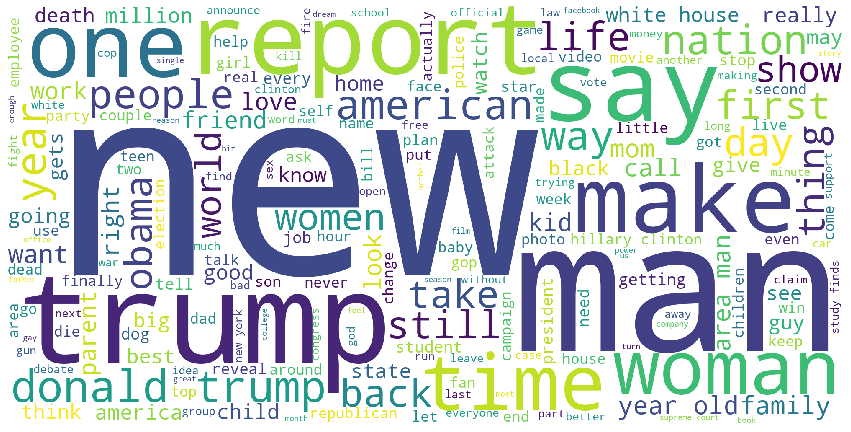

In [8]:
# WORD CLOUD FOR 200 Most frequent words
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 2000 , height = 1000, stopwords = STOPWORDS,background_color = 'white', max_words=200).generate(' '.join(corpus))
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file("iWordCloud.png")

In [7]:
# FROMING TF_IDF Matrix
from sklearn.feature_extraction.text  import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features = 10000) #max_features = 10000, ngram_range=(2,2)
X_tfidf = tfidf_vect.fit_transform(corpus)

In [8]:
#LDA to get top 6 topics related to news headline
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components = 6)
LDA.fit(X_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [9]:
for index, topic in enumerate(LDA.components_):
    print(f'The TOP 15 words for topic #{index}')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The TOP 15 words for topic #0
['deal', 'white', 'one', 'court', 'iran', 'donald', 'president', 'house', 'says', 'gop', 'bush', 'man', 'new', 'obama', 'trump']


The TOP 15 words for topic #1
['americans', 'hillary', 'sanders', 'woman', 'health', 'like', 'really', 'first', 'report', 'clinton', 'area', 'one', 'new', 'trump', 'man']


The TOP 15 words for topic #2
['parents', 'home', 'woman', 'teacher', 'back', 'james', 'pope', 'game', 'first', 'old', 'day', 'trump', 'year', 'man', 'new']


The TOP 15 words for topic #3
['report', 'family', 'trump', 'day', 'police', 'introduces', 'year', 'people', 'time', 'woman', 'women', 'need', 'know', 'man', 'new']


The TOP 15 words for topic #4
['people', 'still', 'get', 'ways', 'one', 'right', 'best', 'donald', 'school', 'report', 'world', 'years', 'man', 'trump', 'new']


The TOP 15 words for topic #5
['baby', 'cruz', 'guy', 'ted', 'old', 'america', 'year', 'woman', 'paul', 'make', 'donald', 'time', 'new', 'man', 'trump']




In [10]:
# Creating Data frame using TFIDF Matrix
dataset = pd.DataFrame(X_tfidf.toarray(),columns=tfidf_vect.get_feature_names())
dataset.head()

,aaron,aarp,abandon,abandoned,abandoning,abbey,abc,abdul,ability,able,...,zero,zika,zimmerman,zinke,zip,zone,zones,zoo,zoologists,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#splitting data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.20)

In [12]:
#Logistic Regression 

classifier = LogisticRegression(solver='saga')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2527  455]
 [ 700 2042]]
0.7982180293501048
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2982
           1       0.82      0.74      0.78      2742

    accuracy                           0.80      5724
   macro avg       0.80      0.80      0.80      5724
weighted avg       0.80      0.80      0.80      5724



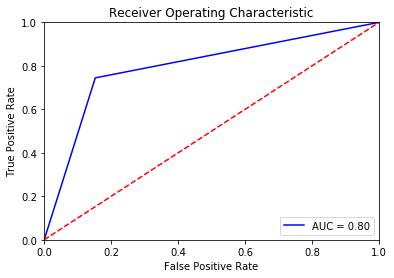

In [15]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
# Naive Bayes Classifier

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [17]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2489  493]
 [ 643 2099]]
0.8015373864430468
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2982
           1       0.81      0.77      0.79      2742

    accuracy                           0.80      5724
   macro avg       0.80      0.80      0.80      5724
weighted avg       0.80      0.80      0.80      5724



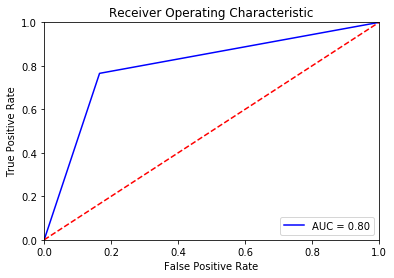

In [18]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
# Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2442  540]
 [ 887 1855]]
0.7506988120195668
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      2982
           1       0.77      0.68      0.72      2742

    accuracy                           0.75      5724
   macro avg       0.75      0.75      0.75      5724
weighted avg       0.75      0.75      0.75      5724



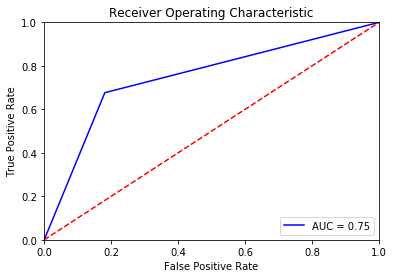

In [21]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
# XGBoost Classifier
classifier = XGBClassifier(nthread =-1).fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [23]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2607  375]
 [1163 1579]]
0.7313067784765898
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      2982
           1       0.81      0.58      0.67      2742

    accuracy                           0.73      5724
   macro avg       0.75      0.73      0.72      5724
weighted avg       0.75      0.73      0.72      5724



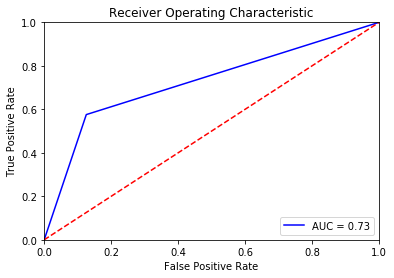

In [24]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using Deep Learning for Better Accuracy

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
corpus=[]

for i in range(0,len(X)):
    #headline = re.sub('[^a-zA-Z0-9]', ' ', X[i])
    headline = X[i].lower()
    headline = headline.split()
    #ps=PorterStemmer()
    #headline = [ps.stem(word) for word in headline if not word in set(STOPWORDS)]
    headline = ' '.join(headline)
    corpus.append(headline)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)#random_state = 10
print(len(X_train),len(X_test),len(y_train),len(y_test))

25757 2862 25757 2862


In [8]:
vocab_size=15000
oov_tok = '<OOV>'

In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [10]:
# Converting text to numeric format 
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=120,  truncating='post')#padding='post',

validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, maxlen=120,  truncating='post')#padding='post',


In [11]:
# Creating Layers in the Deep learning Neural Network
model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, 16,input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100,kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l1(0.003),activation='sigmoid')#, activation='softmax'sigmoid
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           240000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 259,545
Trainable params: 259,345
Non-trainable params: 200
________________________________________________

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
num_epochs = 10
history = model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(validation_padded, y_test),validation_steps=30, verbose=2)

Train on 25757 samples, validate on 2862 samples
Epoch 1/10
25757/25757 - 63s - loss: 0.5965 - accuracy: 0.8140 - val_loss: 0.1271 - val_accuracy: 0.8510
Epoch 2/10
25757/25757 - 48s - loss: 0.2509 - accuracy: 0.9130 - val_loss: 0.1101 - val_accuracy: 0.8698
Epoch 3/10
25757/25757 - 38s - loss: 0.1670 - accuracy: 0.9508 - val_loss: 0.1557 - val_accuracy: 0.8365
Epoch 4/10
25757/25757 - 40s - loss: 0.1164 - accuracy: 0.9701 - val_loss: 0.1952 - val_accuracy: 0.8479
Epoch 5/10
25757/25757 - 41s - loss: 0.0854 - accuracy: 0.9815 - val_loss: 0.2006 - val_accuracy: 0.8438
Epoch 6/10
25757/25757 - 57s - loss: 0.0691 - accuracy: 0.9861 - val_loss: 0.1997 - val_accuracy: 0.8542
Epoch 7/10
25757/25757 - 55s - loss: 0.0562 - accuracy: 0.9902 - val_loss: 0.2149 - val_accuracy: 0.8490
Epoch 8/10
25757/25757 - 53s - loss: 0.0516 - accuracy: 0.9909 - val_loss: 0.2324 - val_accuracy: 0.8354
Epoch 9/10
25757/25757 - 54s - loss: 0.0453 - accuracy: 0.9933 - val_loss: 0.2659 - val_accuracy: 0.8406
Epoch 

In [14]:
y_pred = model.predict_classes(validation_padded)

In [15]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1252  232]
 [ 206 1172]]
0.8469601677148847
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1484
           1       0.83      0.85      0.84      1378

    accuracy                           0.85      2862
   macro avg       0.85      0.85      0.85      2862
weighted avg       0.85      0.85      0.85      2862



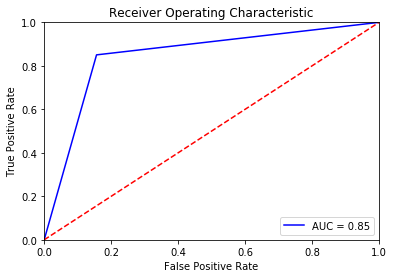

In [16]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()